### Author: Allan Jeeboo 
### Preferred Name: Vyncent S. A. van der Wolvenhuizen 
### Affiliation: Student at TripleTen 
### Email: vanderwolvenhuizen.vyncent@proton.me
### Date Started: 2025-03-12 
### Last Updated: 2025-05-11 11:27

# 1.0 Introduction
This project places us in the role of developing a model that analyzes subscribers' behavior for the telecommunications company Megaline. This model will recommend one of their newer plans: Smart or Ultra. 

We have access to behavior data about subscribers who have already switched to the new plans (from the project for the Statistical Data Analysis sprint). For this classification task, we need to develop a model that will pick the right plan. Since we’ve already performed the data preprocessing step, we can move straight to creating the model. For good measure though, let's perform some quick preprocessing and a bit of EDA.

We'll create a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. We'll check the accuracy using the test dataset. 

### Workflow Path
1. **Introduction**: Define the problem and objectives of the project.
    - Import necessary libraries and load the dataset.
    - Understand the dataset and its features.
2. **Preprocessing & EDA**: Clean the data, handle missing values, and perform exploratory data analysis.
3. **Model Creation**:
    - Decision Tree Classifier
    - Random Forest Classifier
    - Logistic Regression
4. **Conclusion**: Summarize findings and recommend the best model. 
---

### 1.1 Module & Data Import

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('users_behavior.csv')

display(df.head()) 
print(f'rows, columns: {df.shape}')

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


rows, columns: (3214, 5)


---

### 1.2 Data Description
This dataset contains monthly behavior information regarding users.
- сalls: Number of calls.
- minutes: Total call duration in minutes.
- messages: Number of text messages.
- mb_used: Internet traffic used in MB.
- is_ultra: Plan for the current month (Ultra - 1, Smart - 0).

---
---

# 2.0 Preprocessing & EDA 
In this section, we'll preprocess the data and perform exploratory data analysis (EDA). First, we'll check for missing values, duplicates, and ensure that the data types of each column are appropriate. If necessary, we'll make adjustments to the data types. Next, we'll split the dataset into two groups based on the `is_ultra` column to compare the behavior of customers with and without the Ultra plan. We'll calculate the counts and percentages of each group and visualize this information using a bar plot. Following this, we'll analyze the distributions of key features such as calls, minutes, messages, and MB used for both groups using descriptive statistics and histograms. This analysis will help us understand the differences in behavior between the two customer groups and provide insights for model creation in the next section. 

---

### 2.1 Preprocessing 
In this section, we'll preprocess the data to ensure it's clean and ready for analysis. We'll check for missing values (NaN), duplicates, and verify that the data types (dtypes) of each column are appropriate. If necessary, we'll make adjustments to the data types to ensure consistency. This step will help us identify any potential issues in the dataset that could impact the analysis or model performance.

In [20]:
nans = df.isna().sum()
duplicates = df.duplicated().sum()
dtypes = df.dtypes 

print( f'nans: \n{nans}\n')
print(f'duplicates: {duplicates}\n') 
print(f'dtypes: \n{dtypes}\n')

nans: 
calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

duplicates: 0

dtypes: 
calls       float64
minutes     float64
messages    float64
mb_used     float64
is_ultra      int64
dtype: object



From the output, we see that there are 0 NaNs and 0 duplicates. However, the `calls` and `messages` columns are of type `float`, which isn't appropriate. These columns represent discrete values, and fractional calls or messages aren't possible. Therefore, we need to convert these columns to integers to ensure consistency and accuracy. 

In [21]:
df.calls = df.calls.astype('int')
df.messages = df.messages.astype('int')
print(f'dtypes: \n{df.dtypes}\n')

dtypes: 
calls         int64
minutes     float64
messages      int64
mb_used     float64
is_ultra      int64
dtype: object



We've checked for NaNs, duplicates, and ensured the dtypes are as they should be. Let's proceed to EDA. 

---

### 2.2 EDA

We'll start by splitting the dataframe into two groups based on the `is_ultra` column: customers with Ultra (`yes_ultra`) and customers without Ultra (`no_ultra`). This separation allows us to compare the behavior of these two groups effectively. 

Next, we'll calculate the total number of customers in each group (`has_ultra` for Ultra users and `not_has_ultra` for non-Ultra users) and their respective percentages. These statistics will provide an overview of the distribution of customers across the two plans.

Finally, we'll visualize this information using a bar plot to better understand the proportion of customers in each group.

In [22]:
yes_ultra = df[df['is_ultra'] == 1]
no_ultra = df[df['is_ultra'] == 0]
has_ultra = yes_ultra['is_ultra'].count()
not_has_ultra = no_ultra['is_ultra'].count()

print(f'Customers with Ultra: {has_ultra}\nPercentage: {has_ultra/df.shape[0]*100:.2f}%')
print(f'Customers without Ultra: {not_has_ultra}\nPercentage: {not_has_ultra/df.shape[0]*100:.2f}%')

Customers with Ultra: 985
Percentage: 30.65%
Customers without Ultra: 2229
Percentage: 69.35%


([<matplotlib.axis.XTick at 0x286a9fa1c40>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

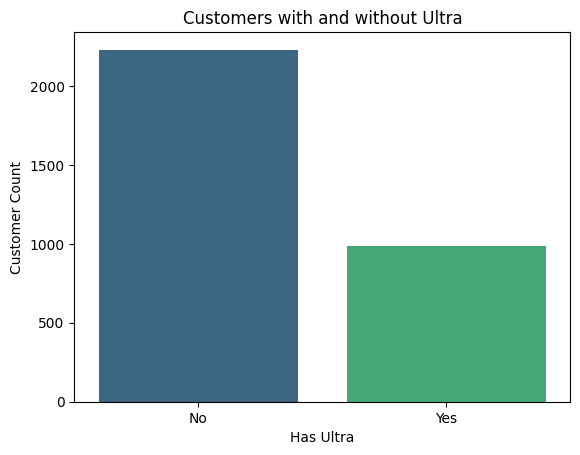

In [23]:
sns.barplot(x=['not_has_ultra', 'has_ultra'], 
            y=df['is_ultra'].value_counts(), 
            palette='viridis', 
            hue= ['not_has_ultra', 'has_ultra'])

plt.title('Customers with and without Ultra')
plt.xlabel('Has Ultra')
plt.ylabel('Customer Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

From the data we have, most customers don't have ultra - 2,229 or 69.35% to be precise. Now let's use the describe() method on both for a more thorough breakdown and create histograms to visualize the differences between various columns.

In [24]:
print('Description of customers with Ultra:')
display(yes_ultra.describe())
print('Description of customers without Ultra:')
display(no_ultra.describe())


Description of customers with Ultra:


,calls,minutes,messages,mb_used,is_ultra
count,985.000000,985.000000,985.000000,985.000000,985.0
mean,73.392893,511.224569,49.363452,19468.823228,1.0
std,43.916853,308.031100,47.804457,10087.178654,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,41.000000,276.030000,6.000000,11770.280000,1.0
50%,74.000000,502.550000,38.000000,19308.010000,1.0
75%,104.000000,730.050000,79.000000,26837.720000,1.0
max,244.000000,1632.060000,224.000000,49745.730000,1.0


Description of customers without Ultra:


,calls,minutes,messages,mb_used,is_ultra
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.0
mean,58.463437,405.942952,33.384029,16208.466949,0.0
std,25.939858,184.512604,28.227876,5870.498853,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,40.000000,274.230000,10.000000,12643.050000,0.0
50%,60.000000,410.560000,28.000000,16506.930000,0.0
75%,76.000000,529.510000,51.000000,20043.060000,0.0
max,198.000000,1390.220000,143.000000,38552.620000,0.0


The 25 percentile range is similar between the two across all categories, aside from MB used being a little more noticeabe in those without Ultra; however, across all other percentiles in addition to the means and standard deviations, non-Ultra falls behind Ultra. Let's create visuals for the distribution of calls, minutes, messages, and MB used. To do this, we'll use a histogram with kde set to true. Note that because ~70% of users do not have Ultra and the y-axis represents frequency; i.e, how many customers used some category, non-Ultra will appear to be more significant than Ultra. 

---

### Transitional Note 
Sections 2.3 through 2.6 will follow this structure: 

**2.N Distribution of X**
1. **Histogram**: Visual representation of the data distribution.
2. **Descriptive Statistics**: Summary statistics for the feature.
3. **Observations**: Key insights and differences between Ultra and Non-Ultra users. 

---

### 2.3 Distribution of Calls

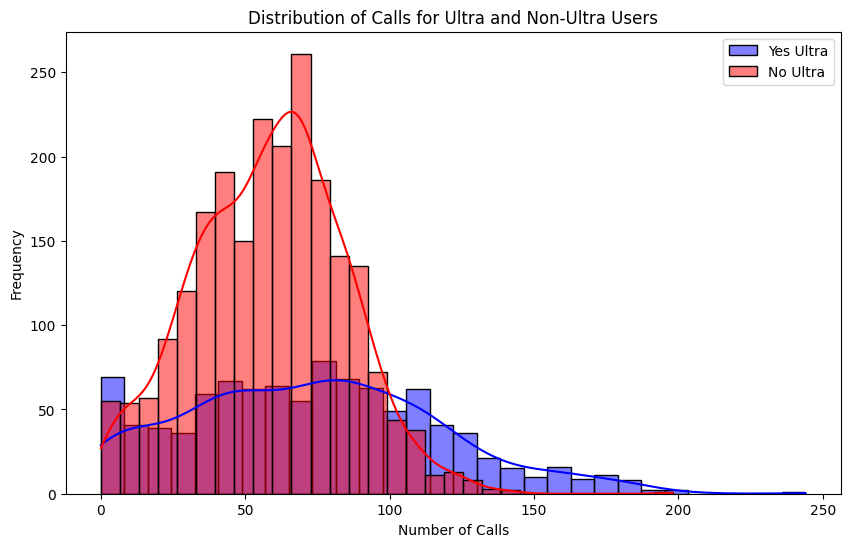

In [25]:
plt.figure(figsize= (10, 6))
sns.histplot(yes_ultra['calls'], 
             kde= True, bins= 30, 
             color= 'blue', 
             label= 'Yes Ultra', 
             alpha= 0.5)
sns.histplot(no_ultra['calls'], 
             kde= True, 
             bins= 30, 
             color= 'red', 
             label= 'No Ultra', 
             alpha= 0.5)
plt.title('Distribution of Calls for Ultra and Non-Ultra Users')
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [26]:
print(f'As a reminder of our call stats:')
print(f'Ultra:\n{yes_ultra['calls'].describe()}\n')
print(f'No Ultra:\n{no_ultra['calls'].describe()}\n')

As a reminder of our call stats:
Ultra:
count    985.000000
mean      73.392893
std       43.916853
min        0.000000
25%       41.000000
50%       74.000000
75%      104.000000
max      244.000000
Name: calls, dtype: float64

No Ultra:
count    2229.000000
mean       58.463437
std        25.939858
min         0.000000
25%        40.000000
50%        60.000000
75%        76.000000
max       198.000000
Name: calls, dtype: float64



**2.3 Summary** 

We analyzed the distribution of calls for Ultra and Non-Ultra users. The histogram revealed that Non-Ultra users generally make fewer calls compared to Ultra users, with a noticeable difference in the frequency of higher call counts. The descriptive statistics confirmed this observation, showing that Ultra users have a higher mean and median number of calls. This suggests that Ultra users tend to utilize their plans more actively in terms of call usage. 

---

### 2.4 Distribution of Minutes

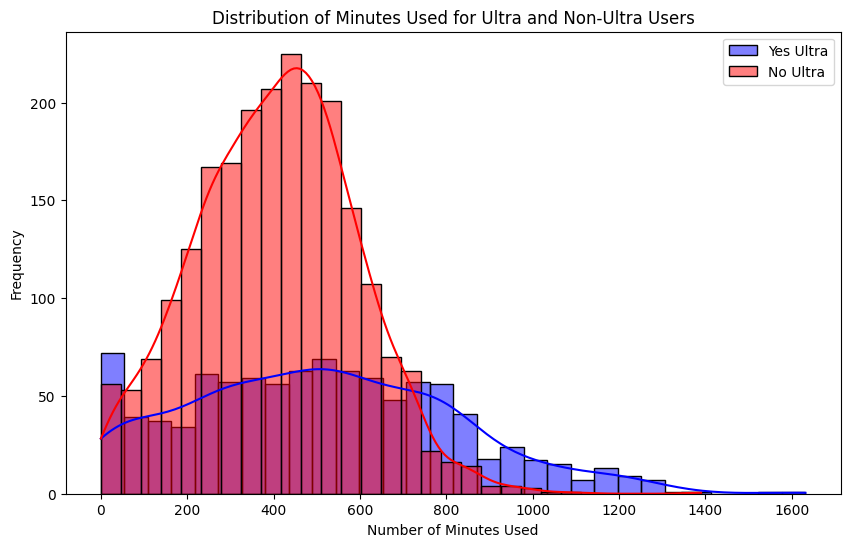

In [27]:
plt.figure(figsize= (10, 6))
sns.histplot(yes_ultra['minutes'], 
             kde= True, bins= 30, 
             color= 'blue', 
             label= 'Yes Ultra', 
             alpha= 0.5)
sns.histplot(no_ultra['minutes'], 
             kde= True, 
             bins= 30, 
             color= 'red', 
             label= 'No Ultra', 
             alpha= 0.5)
plt.title('Distribution of Minutes Used for Ultra and Non-Ultra Users')
plt.xlabel('Number of Minutes Used')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [28]:
print(f'As a reminder of our minutes stats:')
print(f'Ultra:\n{yes_ultra['minutes'].describe()}\n')
print(f'No Ultra:\n{no_ultra['minutes'].describe()}\n')

As a reminder of our minutes stats:
Ultra:
count     985.000000
mean      511.224569
std       308.031100
min         0.000000
25%       276.030000
50%       502.550000
75%       730.050000
max      1632.060000
Name: minutes, dtype: float64

No Ultra:
count    2229.000000
mean      405.942952
std       184.512604
min         0.000000
25%       274.230000
50%       410.560000
75%       529.510000
max      1390.220000
Name: minutes, dtype: float64



**2.4 Summary**

The analysis of the distribution of minutes used by Ultra and Non-Ultra users reveals distinct patterns. Ultra users tend to use significantly more minutes on average compared to Non-Ultra users, as evidenced by the higher mean and median values in the descriptive statistics. The histogram further highlights this difference, showing a wider spread and higher frequency of larger minute usage among Ultra users. This suggests that Ultra users are more likely to take advantage of their plan's benefits for extended call durations. 

### 2.5 Distribution of Messages

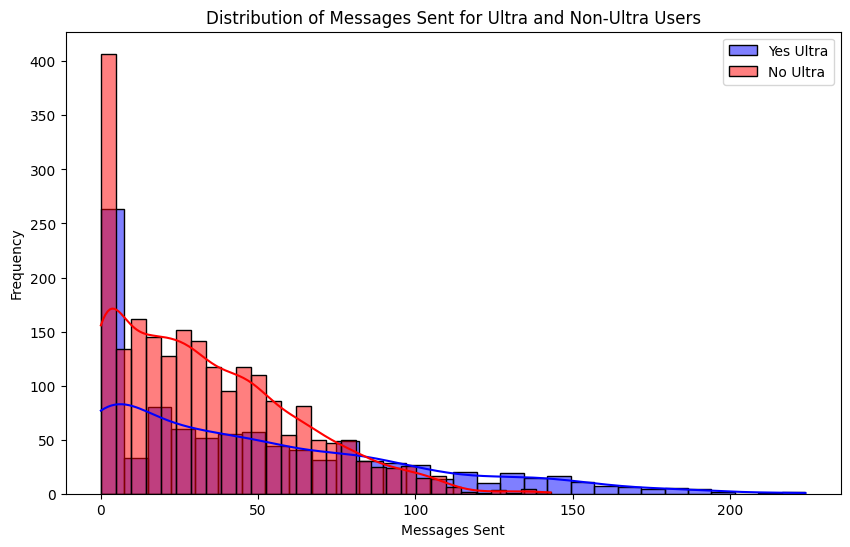

In [29]:
plt.figure(figsize= (10, 6))
sns.histplot(yes_ultra['messages'], 
             kde= True, bins= 30, 
             color= 'blue', 
             label= 'Yes Ultra', 
             alpha= 0.5)
sns.histplot(no_ultra['messages'], 
             kde= True, 
             bins= 30, 
             color= 'red', 
             label= 'No Ultra', 
             alpha= 0.5)
plt.title('Distribution of Messages Sent for Ultra and Non-Ultra Users')
plt.xlabel('Messages Sent')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [30]:
print(f'As a reminder of our message stats:')
print(f'Ultra:\n{yes_ultra['messages'].describe()}\n')
print(f'No Ultra:\n{no_ultra['messages'].describe()}\n')

As a reminder of our message stats:
Ultra:
count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages, dtype: float64

No Ultra:
count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages, dtype: float64



**2.5 Summary**

The analysis of the distribution of messages sent by Ultra and Non-Ultra users highlights notable differences. Ultra users tend to send more messages on average compared to Non-Ultra users, as evidenced by the higher mean and median values in the descriptive statistics. The histogram further illustrates this disparity, showing a higher frequency of larger message counts among Ultra users. This suggests that Ultra users are more likely to take advantage of their plan's messaging benefits, while Non-Ultra users exhibit more conservative messaging behavior. 

---

### 2.6 Distribution of MB Used

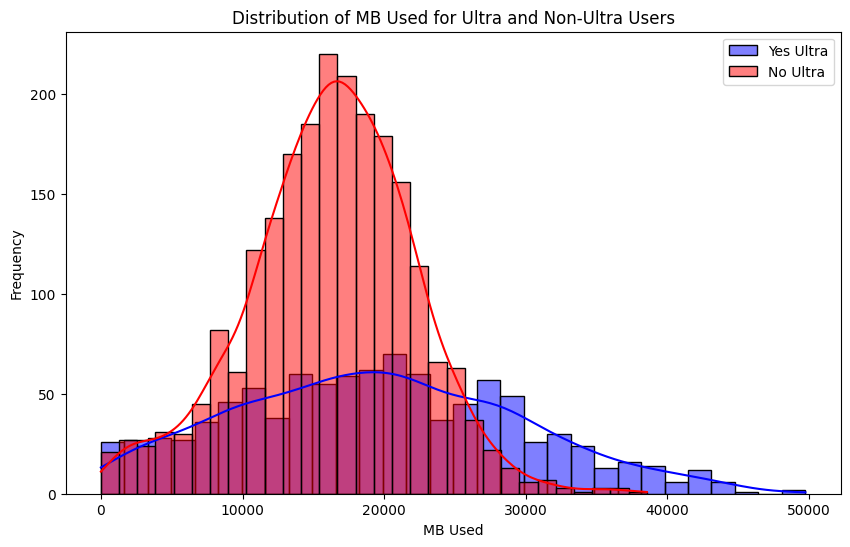

In [31]:
plt.figure(figsize= (10, 6))
sns.histplot(yes_ultra['mb_used'], 
             kde= True, bins= 30, 
             color= 'blue', 
             label= 'Yes Ultra', 
             alpha= 0.5)
sns.histplot(no_ultra['mb_used'], 
             kde= True, 
             bins= 30, 
             color= 'red', 
             label= 'No Ultra', 
             alpha= 0.5)
plt.title('Distribution of MB Used for Ultra and Non-Ultra Users')
plt.xlabel('MB Used')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [32]:
print(f'As a reminder of our MB stats:')
print(f'Ultra:\n{yes_ultra['mb_used'].describe()}\n')
print(f'No Ultra:\n{no_ultra['mb_used'].describe()}\n')

As a reminder of our MB stats:
Ultra:
count      985.000000
mean     19468.823228
std      10087.178654
min          0.000000
25%      11770.280000
50%      19308.010000
75%      26837.720000
max      49745.730000
Name: mb_used, dtype: float64

No Ultra:
count     2229.000000
mean     16208.466949
std       5870.498853
min          0.000000
25%      12643.050000
50%      16506.930000
75%      20043.060000
max      38552.620000
Name: mb_used, dtype: float64



**2.6 Summary**

The analysis of the distribution of MB used by Ultra and Non-Ultra users reveals significant differences. Ultra users tend to consume more internet data on average compared to Non-Ultra users, as indicated by higher mean and median values in the descriptive statistics. The histogram further emphasizes this disparity, showing a higher frequency of larger MB usage among Ultra users. This suggests that Ultra users are more likely to take full advantage of their plan's data benefits, while Non-Ultra users exhibit more conservative data usage patterns. 

---

### 2.7 Summary: Preprocessing & EDA 

In Chapter 2.0, we focused on preparing the dataset for analysis and gaining insights into customer behavior through exploratory data analysis (EDA). 

#### Key Steps:
1. **Preprocessing**:
    - Verified the dataset for missing values and duplicates, finding none.
    - Adjusted data types for the `calls` and `messages` columns to integers, ensuring consistency.

2. **EDA**:
    - Split the dataset into two groups: customers with the Ultra plan (`yes_ultra`) and those without (`no_ultra`).
    - Analyzed the distribution of key features (`calls`, `minutes`, `messages`, and `mb_used`) for both groups using histograms and descriptive statistics.
    - Observed that Ultra users generally exhibit higher usage across all features compared to non-Ultra users.

#### Insights:
- Ultra users tend to make more calls, use more minutes, send more messages, and consume more internet data than non-Ultra users.
- The differences in usage patterns between the two groups provide valuable insights for building predictive models in the next chapter.

---
---

# 3.0 Model Creation 

In this section, we'll test three types of classification models:  
- **Decision Tree Classifier**  
- **Random Forest Classifier**  
- **Logistic Regression**

Our goal is to predict whether a user is an Ultra plan subscriber (`is_ultra`). Since `is_ultra` is a binary variable (0 or 1), we'll use classification models. The target variable will be `is_ultra`, and all other columns (`calls`, `minutes`, `messages`, `mb_used`) will serve as features. 

---

### 3.1 Decision Tree Classifier

First, we need to establish the features and target variables. The features will include all columns except `is_ultra`, which will serve as the target variable. 

Next, we'll split the dataset into training, validation, and test sets. The test set will comprise 20% of the data, while the remaining 80% will be split again into training and validation sets, the former containing 60% and the latter 20% of the original dataset. This results in a 3:1:1 ratio for training, validation, and test sets.

Throughout this project, we use a fixed `random_state` value of 12345 to ensure reproducibility.

In [33]:
features = df.drop('is_ultra', axis= 1) 
target = df['is_ultra']
train_valid, test = train_test_split(df, test_size= 0.2, random_state= 12345)
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size= 0.2, random_state= 12345)

print(f'feature rows, columns:', features.shape)
print(f'target rows:', target.shape)
print(f'test rows, columns:', test.shape)

feature rows, columns: (3214, 4)
target rows: (3214,)
test rows, columns: (643, 5)


Now let's tune the model and see which depth yields the best accuracy.

In [34]:
best_dtc_accuracy = 0 
best_dtc_depth = 0 
best_dtc_model = None

for depth in range (1, 10): 
    decision_tree_model = DecisionTreeClassifier(random_state= 12345, max_depth= depth) 
    decision_tree_model.fit(features_train, target_train)
    predictions_valid = decision_tree_model.predict(features_valid) 
    print(f'Validation accuracy for depth {depth}: {accuracy_score(target_valid, predictions_valid)}')
    if accuracy_score(target_valid, predictions_valid) > best_dtc_accuracy: 
        best_dtc_accuracy = accuracy_score(target_valid, predictions_valid)
        best_dtc_depth = depth
        best_dtc_model = decision_tree_model

test_features = test.drop('is_ultra', axis = 1)
test_target = test['is_ultra']
train_pedictions = decision_tree_model.predict(features_train)
test_predictions = decision_tree_model.predict(test_features)

print(f'Accuracy on the train set: {accuracy_score(target_train, train_pedictions)}')
print(f'Best Decision Tree Classifier accuracy: {best_dtc_accuracy} with depth {best_dtc_depth}')
print(f'Accuracy on the test set: {accuracy_score(test_target, test_predictions)}')

Validation accuracy for depth 1: 0.7480559875583204
Validation accuracy for depth 2: 0.7807153965785381
Validation accuracy for depth 3: 0.7838258164852255
Validation accuracy for depth 4: 0.7791601866251944
Validation accuracy for depth 5: 0.7853810264385692
Validation accuracy for depth 6: 0.7822706065318819
Validation accuracy for depth 7: 0.7791601866251944
Validation accuracy for depth 8: 0.7729393468118196
Validation accuracy for depth 9: 0.7791601866251944
Accuracy on the train set: 0.8638661999222093
Best Decision Tree Classifier accuracy: 0.7853810264385692 with depth 5
Accuracy on the test set: 0.7791601866251944


Our sets have an accuracy, rounded to three decimal places, of:  
- Training: 86.888%
- Validation: 78.538%
- Test: 78.849%

Usually the test and validation sets have about the same value, and seeing as the difference here is a mere 0.311%, that's a good sign.
In addition to that, a max depth of 5 appears to yield the best validation accuracy. 

---

### 3.2 Random Forest Classifier

Random Forest Classifiers have the highest degree of accuracy due to the fact that it generates a specified quantity of independent trees, then votes on the best model. The downside though is that due to the fact that it's generating multiple trees, it has a low speed.

In [35]:
best_score = 0 
best_est = 0 
for est in range(1, 100): 
    random_forest_model = RandomForestClassifier(random_state= 12345, n_estimators= est) 
    random_forest_model.fit(features_train, target_train)
    score_valid = random_forest_model.score(features_valid, target_valid)
    if score_valid > best_score: 
        best_score = score_valid
        best_est = est

print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

final_model = RandomForestClassifier(random_state=12345, n_estimators=best_est) # change n_estimators to get best model
final_model.fit(features_train, target_train)
train_predictions = final_model.predict(features_train)
test_predictions = final_model.predict(test_features)
print(f'Accuracy on the train set: {accuracy_score(target_train, train_predictions)}')
print(f'Accuracy on the test set: {accuracy_score(test_target, test_predictions)}')

Accuracy of the best model on the validation set (n_estimators = 20): 0.7884914463452566
Accuracy on the train set: 0.9906651108518086
Accuracy on the test set: 0.7884914463452566


Our sets have an accuracy, rounded to three decimal places, of:  
- Training: 99.067%
- Validation: 78.849%
- Test: 79.849%

In addition to that, the best estimate in range 1 to 100 appears to be n_estimators= 20. 

The validation set for the Random Forest typically tends to yields a higher accuracy than that of the Decision Tree, and it just barely does so in this test. 

---

### 3.3 Logistic Regression

In [36]:
logistic_model = LogisticRegression(random_state= 12345, solver= 'liblinear')
logistic_model.fit(features_train, target_train)  # train model on training set
score_train = logistic_model.score(features_train, target_train) # calculate accuracy score on training set  
score_valid = logistic_model.score(features_valid, target_valid)
     # calculate accuracy score on validation set  

print(
    "Accuracy of the logistic regression model on the training set:",
    score_train,
)
print(
    "Accuracy of the logistic regression model on the validation set:",
    score_valid,
)

Accuracy of the logistic regression model on the training set: 0.7016725009723843
Accuracy of the logistic regression model on the validation set: 0.702954898911353


Our sets have an accuracy, rounded to three decimal places, of:  
- Training: 70.167%
- Validation: 70.295%

The logistic regression model has the lowest accuracy of all tested model types. 

### 3.4 Summary: Model Creation

In Chapter 3.0, we explored three classification models to predict whether a user is an Ultra plan subscriber:

1. **Decision Tree Classifier**:
    - Best validation accuracy: **78.538%** with a max depth of **5**.
    - Test accuracy: **78.849%**.
    - The Decision Tree model provided a good balance between simplicity and accuracy.

2. **Random Forest Classifier**:
    - Best validation accuracy: **78.849%** with **20 estimators**.
    - Test accuracy: **79.849%**.
    - The Random Forest model achieved the highest accuracy but at the cost of increased computational complexity.

3. **Logistic Regression**:
    - Validation accuracy: **70.295%**.
    - Test accuracy: **70.167%**.
    - Logistic Regression had the lowest accuracy among the models, failing to meet the 75% threshold.

#### Conclusion:
The **Random Forest Classifier** emerged as the best-performing model, achieving the highest accuracy on both validation and test datasets. However, its computational cost should be considered when deploying the model.
write

---
---

# 4.0 Conclusion

Through this project, we have tested three models and they've yielded the following validation accuracies:
 - Decision Tree Classifier: 78.538%. A max depth of 5 yielded the best results.
 - Random Forest Classifier: 78.849%. n_estimators= 20 yielded the best results. 
 - Logistic Regression: 70.295% 

Validation accuracy reflects how often the model reaches the correct answer. Seeing as there are two possible answers to whether or not Megaline users are ultra users or not, our sanity check threshold is 50%; i.e., through random chance the result would be right half of the time. All of our models produced results above that, but for the 75% threshold mentioned at the beginning of this project, the Logistic Regression model failed to exceed that. That being said, the Random Forest Classifier appears to be the best model to use in regards to recommending plans to Megaline customers. One downside that needs to be reiterated is that because this type of model is processing multiple trees, it is the slowest. 

---
---